In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Aug 24 18:33:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, TFBertForSequenceClassification

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Enable GPU growth if necessary
for device in tf.config.list_physical_devices('GPU'):
    tf.config.experimental.set_memory_growth(device, True)

Num GPUs Available:  1


In [ ]:
type_name_list = ['sector', 'role', 'degree', 'field']
results = []
for type_name in type_name_list:
  df = pd.read_csv('/content/drive/MyDrive/' + type_name + '_full_fla.csv')
  label_encoder = LabelEncoder()
  df['label_encoded'] = label_encoder.fit_transform(df['value'])
  num_classes = len(set(df['label_encoded']))
  test_set_sizes = [ 0.8, 0.6,  0.4, 0.2]
  for test_size in test_set_sizes:
    print(str(type_name), str(test_size))
    train_dataset, test_dataset = create_dataset(df, test_size)
    accuracy = fine_tune_bert(train_dataset, test_dataset, num_classes)
    results.append({'type': type_name, 'test_set_size': test_size, 'accuracy': accuracy})

df_results = pd.DataFrame(results)
df_results.to_csv('/content/drive/MyDrive/code_classifiers_results.csv', index=False)

sector 0.8


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
147/147 [==============================] - 122s 548ms/step - loss: 1.9632 - accuracy: 0.3983 - val_loss: 1.7135 - val_accuracy: 0.4791
Epoch 2/5
147/147 [==============================] - 78s 532ms/step - loss: 1.4261 - accuracy: 0.5675 - val_loss: 1.2037 - val_accuracy: 0.6186
Epoch 3/5
147/147 [==============================] - 78s 531ms/step - loss: 0.9057 - accuracy: 0.7607 - val_loss: 0.8943 - val_accuracy: 0.7434
Epoch 4/5
147/147 [==============================] - 78s 534ms/step - loss: 0.4958 - accuracy: 0.8752 - val_loss: 0.8759 - val_accuracy: 0.7547
Epoch 5/5
585/585 [==============================] - 47s 80ms/step - loss: 0.7785 - accuracy: 0.7816
sector 0.6


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
293/293 [==============================] - 138s 354ms/step - loss: 1.5312 - accuracy: 0.5509 - val_loss: 0.9786 - val_accuracy: 0.7080
Epoch 2/5
293/293 [==============================] - 100s 340ms/step - loss: 0.7611 - accuracy: 0.7842 - val_loss: 0.7705 - val_accuracy: 0.7684
Epoch 3/5
293/293 [==============================] - 99s 340ms/step - loss: 0.4502 - accuracy: 0.8833 - val_loss: 0.7229 - val_accuracy: 0.8011
Epoch 4/5
293/293 [==============================] - 100s 340ms/step - loss: 0.2728 - accuracy: 0.9295 - val_loss: 0.7856 - val_accuracy: 0.7974
Epoch 5/5
439/439 [==============================] - 35s 80ms/step - loss: 0.8397 - accuracy: 0.8009
sector 0.4


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
439/439 [==============================] - 160s 283ms/step - loss: 1.3594 - accuracy: 0.5937 - val_loss: 0.7909 - val_accuracy: 0.7774
Epoch 2/5
439/439 [==============================] - 121s 275ms/step - loss: 0.6320 - accuracy: 0.8256 - val_loss: 0.7090 - val_accuracy: 0.7940
Epoch 3/5
439/439 [==============================] - 139s 317ms/step - loss: 0.3725 - accuracy: 0.9009 - val_loss: 0.6993 - val_accuracy: 0.8017
Epoch 4/5
439/439 [==============================] - 121s 275ms/step - loss: 0.2625 - accuracy: 0.9299 - val_loss: 0.6714 - val_accuracy: 0.8094
Epoch 5/5
293/293 [==============================] - 24s 81ms/step - loss: 0.7063 - accuracy: 0.8175
sector 0.2


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
585/585 [==============================] - 181s 249ms/step - loss: 1.2657 - accuracy: 0.6278 - val_loss: 0.7173 - val_accuracy: 0.7855
Epoch 2/5
585/585 [==============================] - 143s 244ms/step - loss: 0.5804 - accuracy: 0.8312 - val_loss: 0.5616 - val_accuracy: 0.8179
Epoch 3/5
585/585 [==============================] - 152s 259ms/step - loss: 0.3596 - accuracy: 0.9011 - val_loss: 0.5744 - val_accuracy: 0.8368
Epoch 4/5
585/585 [==============================] - 143s 244ms/step - loss: 0.2452 - accuracy: 0.9357 - val_loss: 0.6028 - val_accuracy: 0.8444
Epoch 5/5
147/147 [==============================] - 12s 80ms/step - loss: 0.6123 - accuracy: 0.8402
role 0.8


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
147/147 [==============================] - 116s 556ms/step - loss: 0.6088 - accuracy: 0.8316 - val_loss: 0.4490 - val_accuracy: 0.8726
Epoch 2/5
147/147 [==============================] - 78s 535ms/step - loss: 0.4076 - accuracy: 0.8821 - val_loss: 0.3697 - val_accuracy: 0.8996
Epoch 3/5
147/147 [==============================] - 78s 534ms/step - loss: 0.3034 - accuracy: 0.9137 - val_loss: 0.3673 - val_accuracy: 0.9120
Epoch 4/5
147/147 [==============================] - 78s 533ms/step - loss: 0.2402 - accuracy: 0.9359 - val_loss: 0.2707 - val_accuracy: 0.9323
Epoch 5/5
585/585 [==============================] - 47s 80ms/step - loss: 0.2909 - accuracy: 0.9312
role 0.6


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
293/293 [==============================] - 138s 352ms/step - loss: 0.5548 - accuracy: 0.8415 - val_loss: 0.4378 - val_accuracy: 0.8615
Epoch 2/5
293/293 [==============================] - 99s 339ms/step - loss: 0.2751 - accuracy: 0.9299 - val_loss: 0.2884 - val_accuracy: 0.9330
Epoch 3/5
293/293 [==============================] - 99s 340ms/step - loss: 0.2450 - accuracy: 0.9380 - val_loss: 0.2435 - val_accuracy: 0.9419
Epoch 4/5
293/293 [==============================] - 100s 340ms/step - loss: 0.1850 - accuracy: 0.9538 - val_loss: 0.2299 - val_accuracy: 0.9436
Epoch 5/5
439/439 [==============================] - 36s 81ms/step - loss: 0.2228 - accuracy: 0.9450
role 0.4


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
439/439 [==============================] - 161s 284ms/step - loss: 0.4268 - accuracy: 0.8923 - val_loss: 0.4488 - val_accuracy: 0.9073
Epoch 2/5
439/439 [==============================] - 121s 276ms/step - loss: 0.2587 - accuracy: 0.9365 - val_loss: 0.2528 - val_accuracy: 0.9419
Epoch 3/5
439/439 [==============================] - 139s 318ms/step - loss: 0.2035 - accuracy: 0.9490 - val_loss: 0.2101 - val_accuracy: 0.9449
Epoch 4/5
439/439 [==============================] - 139s 317ms/step - loss: 0.1859 - accuracy: 0.9501 - val_loss: 0.2224 - val_accuracy: 0.9372
Epoch 5/5
293/293 [==============================] - 24s 80ms/step - loss: 0.2090 - accuracy: 0.9513
role 0.2


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
585/585 [==============================] - 182s 249ms/step - loss: 0.3980 - accuracy: 0.8887 - val_loss: 0.2836 - val_accuracy: 0.9197
Epoch 2/5
585/585 [==============================] - 142s 244ms/step - loss: 0.2367 - accuracy: 0.9316 - val_loss: 0.2144 - val_accuracy: 0.9462
Epoch 3/5
585/585 [==============================] - 151s 259ms/step - loss: 0.1970 - accuracy: 0.9434 - val_loss: 0.1836 - val_accuracy: 0.9487
Epoch 4/5
585/585 [==============================] - 142s 243ms/step - loss: 0.1601 - accuracy: 0.9521 - val_loss: 0.2098 - val_accuracy: 0.9402
Epoch 5/5
147/147 [==============================] - 12s 80ms/step - loss: 0.1749 - accuracy: 0.9513
degree 0.8


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
41/41 [==============================] - 51s 402ms/step - loss: 1.5198 - accuracy: 0.4923 - val_loss: 1.2480 - val_accuracy: 0.5777
Epoch 2/5
41/41 [==============================] - 13s 309ms/step - loss: 0.9666 - accuracy: 0.6985 - val_loss: 0.8441 - val_accuracy: 0.7400
Epoch 3/5
41/41 [==============================] - 13s 309ms/step - loss: 0.6209 - accuracy: 0.8000 - val_loss: 0.7004 - val_accuracy: 0.7723
Epoch 4/5
41/41 [==============================] - 12s 300ms/step - loss: 0.4249 - accuracy: 0.8708 - val_loss: 0.5951 - val_accuracy: 0.8223
Epoch 5/5
163/163 [==============================] - 7s 44ms/step - loss: 0.5485 - accuracy: 0.8454
degree 0.6


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
82/82 [==============================] - 55s 235ms/step - loss: 1.2932 - accuracy: 0.5708 - val_loss: 0.9438 - val_accuracy: 0.7344
Epoch 2/5
82/82 [==============================] - 21s 253ms/step - loss: 0.7726 - accuracy: 0.7554 - val_loss: 0.7375 - val_accuracy: 0.7692
Epoch 3/5
82/82 [==============================] - 15s 187ms/step - loss: 0.5662 - accuracy: 0.8323 - val_loss: 0.6470 - val_accuracy: 0.7918
Epoch 4/5
82/82 [==============================] - 15s 186ms/step - loss: 0.3591 - accuracy: 0.9077 - val_loss: 0.5075 - val_accuracy: 0.8410
Epoch 5/5
122/122 [==============================] - 5s 44ms/step - loss: 0.4760 - accuracy: 0.8708
degree 0.4


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
122/122 [==============================] - 58s 194ms/step - loss: 1.1251 - accuracy: 0.6472 - val_loss: 0.7042 - val_accuracy: 0.7800
Epoch 2/5
122/122 [==============================] - 18s 151ms/step - loss: 0.5683 - accuracy: 0.8400 - val_loss: 0.5392 - val_accuracy: 0.8369
Epoch 3/5
122/122 [==============================] - 19s 153ms/step - loss: 0.3550 - accuracy: 0.9087 - val_loss: 0.5577 - val_accuracy: 0.8277
Epoch 4/5
122/122 [==============================] - 18s 147ms/step - loss: 0.2123 - accuracy: 0.9487 - val_loss: 0.5412 - val_accuracy: 0.8723
Epoch 5/5
82/82 [==============================] - 4s 44ms/step - loss: 0.5205 - accuracy: 0.8785
degree 0.2


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
163/163 [==============================] - 61s 164ms/step - loss: 0.9931 - accuracy: 0.6862 - val_loss: 0.5515 - val_accuracy: 0.8400
Epoch 2/5
163/163 [==============================] - 22s 134ms/step - loss: 0.4402 - accuracy: 0.8769 - val_loss: 0.4150 - val_accuracy: 0.8738
Epoch 3/5
163/163 [==============================] - 21s 129ms/step - loss: 0.2611 - accuracy: 0.9331 - val_loss: 0.3974 - val_accuracy: 0.8892
Epoch 4/5
163/163 [==============================] - 21s 131ms/step - loss: 0.1771 - accuracy: 0.9508 - val_loss: 0.4564 - val_accuracy: 0.8892
Epoch 5/5
41/41 [==============================] - 2s 46ms/step - loss: 0.4669 - accuracy: 0.8769
field 0.8


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
41/41 [==============================] - 52s 406ms/step - loss: 1.9511 - accuracy: 0.2862 - val_loss: 1.7342 - val_accuracy: 0.3185
Epoch 2/5
41/41 [==============================] - 12s 306ms/step - loss: 1.4295 - accuracy: 0.5569 - val_loss: 1.1398 - val_accuracy: 0.6954
Epoch 3/5
41/41 [==============================] - 12s 307ms/step - loss: 0.7848 - accuracy: 0.8154 - val_loss: 0.8191 - val_accuracy: 0.7608
Epoch 4/5
41/41 [==============================] - 12s 305ms/step - loss: 0.3995 - accuracy: 0.9200 - val_loss: 0.7379 - val_accuracy: 0.7900
Epoch 5/5
163/163 [==============================] - 7s 43ms/step - loss: 0.7606 - accuracy: 0.8008
field 0.6


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
82/82 [==============================] - 60s 299ms/step - loss: 1.6460 - accuracy: 0.4338 - val_loss: 1.0605 - val_accuracy: 0.7159
Epoch 2/5
82/82 [==============================] - 16s 193ms/step - loss: 0.8341 - accuracy: 0.7646 - val_loss: 0.8616 - val_accuracy: 0.7221
Epoch 3/5
82/82 [==============================] - 15s 188ms/step - loss: 0.5387 - accuracy: 0.8492 - val_loss: 0.7555 - val_accuracy: 0.7949
Epoch 4/5
82/82 [==============================] - 20s 249ms/step - loss: 0.3590 - accuracy: 0.9092 - val_loss: 0.7273 - val_accuracy: 0.8062
Epoch 5/5
122/122 [==============================] - 5s 45ms/step - loss: 0.7185 - accuracy: 0.8092
field 0.4


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
122/122 [==============================] - 58s 189ms/step - loss: 1.6185 - accuracy: 0.4769 - val_loss: 0.9792 - val_accuracy: 0.7185
Epoch 2/5
122/122 [==============================] - 18s 149ms/step - loss: 0.7145 - accuracy: 0.8072 - val_loss: 0.6830 - val_accuracy: 0.8123
Epoch 3/5
122/122 [==============================] - 18s 151ms/step - loss: 0.4257 - accuracy: 0.8903 - val_loss: 0.5979 - val_accuracy: 0.8277
Epoch 4/5
122/122 [==============================] - 18s 146ms/step - loss: 0.2947 - accuracy: 0.9313 - val_loss: 0.6007 - val_accuracy: 0.8246
Epoch 5/5
82/82 [==============================] - 3s 42ms/step - loss: 0.6728 - accuracy: 0.8231
field 0.2


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
163/163 [==============================] - 62s 162ms/step - loss: 1.3892 - accuracy: 0.5454 - val_loss: 0.7480 - val_accuracy: 0.7969
Epoch 2/5
163/163 [==============================] - 22s 135ms/step - loss: 0.5804 - accuracy: 0.8477 - val_loss: 0.6082 - val_accuracy: 0.8185
Epoch 3/5
163/163 [==============================] - 21s 130ms/step - loss: 0.3519 - accuracy: 0.9085 - val_loss: 0.6450 - val_accuracy: 0.8215
Epoch 4/5
163/163 [==============================] - 22s 134ms/step - loss: 0.2316 - accuracy: 0.9431 - val_loss: 0.7358 - val_accuracy: 0.8092
Epoch 5/5
41/41 [==============================] - 2s 42ms/step - loss: 0.7452 - accuracy: 0.8308


In [ ]:
# prompt: read out the df at this location: '/content/drive/MyDrive/code_classifiers_results.csv'

import pandas as pd
df_results = pd.read_csv('/content/drive/MyDrive/code_classifiers_results.csv')
print(df_results)


      type  test_set_size  accuracy
0   sector            0.8  0.781624
1   sector            0.6  0.800855
2   sector            0.4  0.817521
3   sector            0.2  0.840171
4     role            0.8  0.931197
5     role            0.6  0.945014
6     role            0.4  0.951282
7     role            0.2  0.951282
8   degree            0.8  0.845385
9   degree            0.6  0.870769
10  degree            0.4  0.878462
11  degree            0.2  0.876923
12   field            0.8  0.800769
13   field            0.6  0.809231
14   field            0.4  0.823077
15   field            0.2  0.830769


In [ ]:
def create_dataset(df, test_size):
  train_df, test_df = train_test_split(df, test_size=test_size, stratify=df['label_encoded'], random_state=42)

  # Load the BERT tokenizer
  tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

  # Function to tokenize and prepare input features
  def encode_texts(texts, tokenizer, max_length=128):
      return tokenizer(texts.tolist(), max_length=max_length, padding=True, truncation=True, return_tensors='tf')

  # Tokenize the training and test data
  train_encodings = encode_texts(train_df['text'], tokenizer)
  test_encodings = encode_texts(test_df['text'], tokenizer)

  # Create TensorFlow datasets
  train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_df['label_encoded'].values)).shuffle(len(train_df)).batch(8)
  test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_df['label_encoded'].values)).batch(8)
  return train_dataset, test_dataset

In [ ]:
def fine_tune_bert(train_dataset, test_dataset, num_classes):
  # Load the pre-trained BERT model for sequence classification

  model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)

  # Compile the model
  optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
  model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

  # Train the model
  history = model.fit(train_dataset, validation_data=test_dataset, epochs=5)

  # Save the model
  #model.save_pretrained('/content/drive/MyDrive/bert-fine-tuned-field')

  # Evaluate the model
  evaluation = model.evaluate(test_dataset)
  return(evaluation[1])

In [ ]:
label_mapping = list(label_encoder.classes_)
print("Label Mapping:", label_mapping)

Label Mapping: ['artshum', 'busecon', 'law', 'lifesci', 'na', 'natural', 'socialScience', 'unknown', nan]


In [ ]:
df_results

,type,test_set_size,accuracy
0,sector,0.8,0.781624
1,sector,0.6,0.800855
2,sector,0.4,0.817521
3,sector,0.2,0.840171
4,role,0.8,0.931197
5,role,0.6,0.945014
6,role,0.4,0.951282
7,role,0.2,0.951282
8,degree,0.8,0.845385
9,degree,0.6,0.870769


In [ ]:
type_name_list = ['sector', 'role', 'degree', 'field']
results = []
for type_name in type_name_list:
  df = pd.read_csv('/content/drive/MyDrive/' + type_name + '_full_fla.csv')
  label_encoder = LabelEncoder()
  df['label_encoded'] = label_encoder.fit_transform(df['value'])
  num_classes = len(set(df['label_encoded']))
  print(str(type_name),str(num_classes))

sector 16
role 8
degree 8
field 9


In [ ]:
# prompt: in results_df I want to change the names of the column type. sector should be sector(16), role should be role(8), degree should be degree(8) and field schould be field(9)

df_results['type'] = df_results['type'].replace({
    'sector': 'sector(16)',
    'role': 'role(8)',
    'degree': 'degree(8)',
    'field': 'field(9)'
})
df_results


,type,test_set_size,accuracy
0,sector(16),0.8,0.781624
1,sector(16),0.6,0.800855
2,sector(16),0.4,0.817521
3,sector(16),0.2,0.840171
4,role(8),0.8,0.931197
5,role(8),0.6,0.945014
6,role(8),0.4,0.951282
7,role(8),0.2,0.951282
8,degree(8),0.8,0.845385
9,degree(8),0.6,0.870769


In [ ]:
# prompt: inverse the values of the column test_set size by doing 1 - value

df_results['test_set_size'] = 1 - df_results['test_set_size']
df_results


,type,test_set_size,accuracy
0,sector(16),0.2,0.781624
1,sector(16),0.4,0.800855
2,sector(16),0.6,0.817521
3,sector(16),0.8,0.840171
4,role(8),0.2,0.931197
5,role(8),0.4,0.945014
6,role(8),0.6,0.951282
7,role(8),0.8,0.951282
8,degree(8),0.2,0.845385
9,degree(8),0.4,0.870769


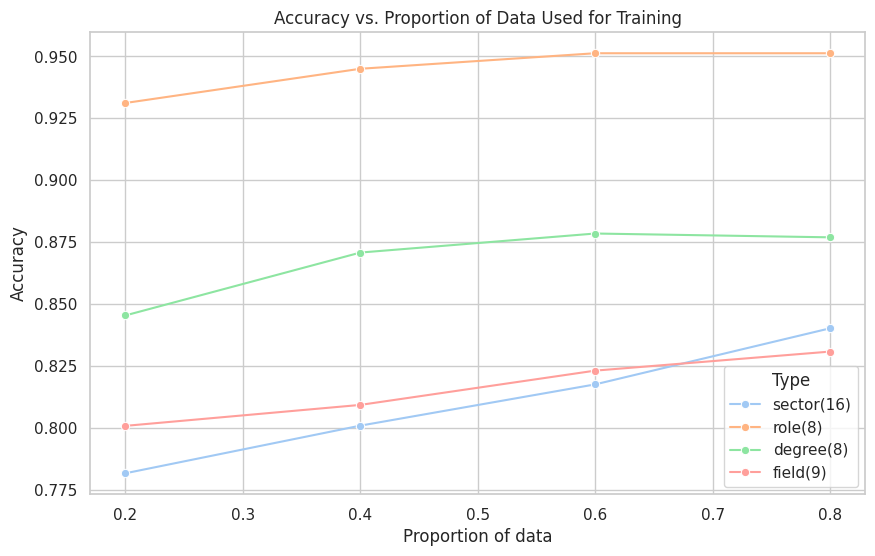

In [ ]:
# prompt: make a seaborne plot out of, accuracy is y axis, test_set_size the x axis and type is the color of the line. Use the seaborne pastel set. invert x-axis

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_results is already defined as in the preceding code

# Set the Seaborn style to use the pastel color palette
sns.set_theme(style="whitegrid", palette="pastel")

# Create the line plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.lineplot(x="test_set_size", y="accuracy", hue="type", data=df_results, marker="o")

# Invert the x-axis

# Set the axis labels and title
plt.xlabel("Proportion of data")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Proportion of Data Used for Training")

# Show the plot
plt.legend(title='Type')
plt.show()
